In [50]:
#Inteligencia Artificial y Redes Neuronales
#Actividad 4. Solución de Problemas II
#Arturo Azael Niño Lopez 1973434
#N1


Lo primero que se tiene que hacer es ingresar las librerias necesarias para realizar el arbol de decision. En este caso se importará un conjunto de datos de kaggle.

In [ ]:
#Importar librerias
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import numpy as np
import glob
import os


In [ ]:
!pip install kaggle
from google.colab import files


In [ ]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arturoni","key":"d60b564926e89987d4cf21747e891d81"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 65.5MB/s]


Una vez se han cargado las librerias, y se ha importado el conjunto de datos, es necesario cargar los datos al codigo.

In [51]:
#Cargar datos
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [52]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

El preprocesamiento de los datos divide la cantidad de datos que van para entrenamiento y la cantidad de datos que van para la prueba.

In [53]:
#Preprocesamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
clf = DecisionTreeClassifier()


Se utliza la funcion fit de scikit learn para entrenar a nuestro modelo.

In [54]:
#Seleccion y Entrenamiento del modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Exactitud del modelo en el entrenamiento.
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)

1.0


Se realizaron 5 predicciones para ver la eficacia y que la exactitud del modelo.

In [ ]:
#Prueba del modelo
y_pred = clf.predict(X_test)

In [ ]:
#Predicción 1
print(y_pred[1])
print(y_test[1])

0
0


In [43]:
#Predicción 2
print(y_pred[15])
print(y_test[15])

0
0


In [44]:
#Predicción 3
print(y_pred[35])
print(y_test[35])

1
1


In [45]:
#Predicción 4
print(y_pred[6])
print(y_test[6])

0
0


In [46]:
#Predicción 5
print(y_pred[100])
print(y_test[100])

0
0


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy: 0.9181286549707602
Classification Report:
               precision    recall  f1-score   support

   malignant       0.87      0.92      0.89        63
      benign       0.95      0.92      0.93       108

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



Por último se adjunta la imagen del árbol de decisión terminado

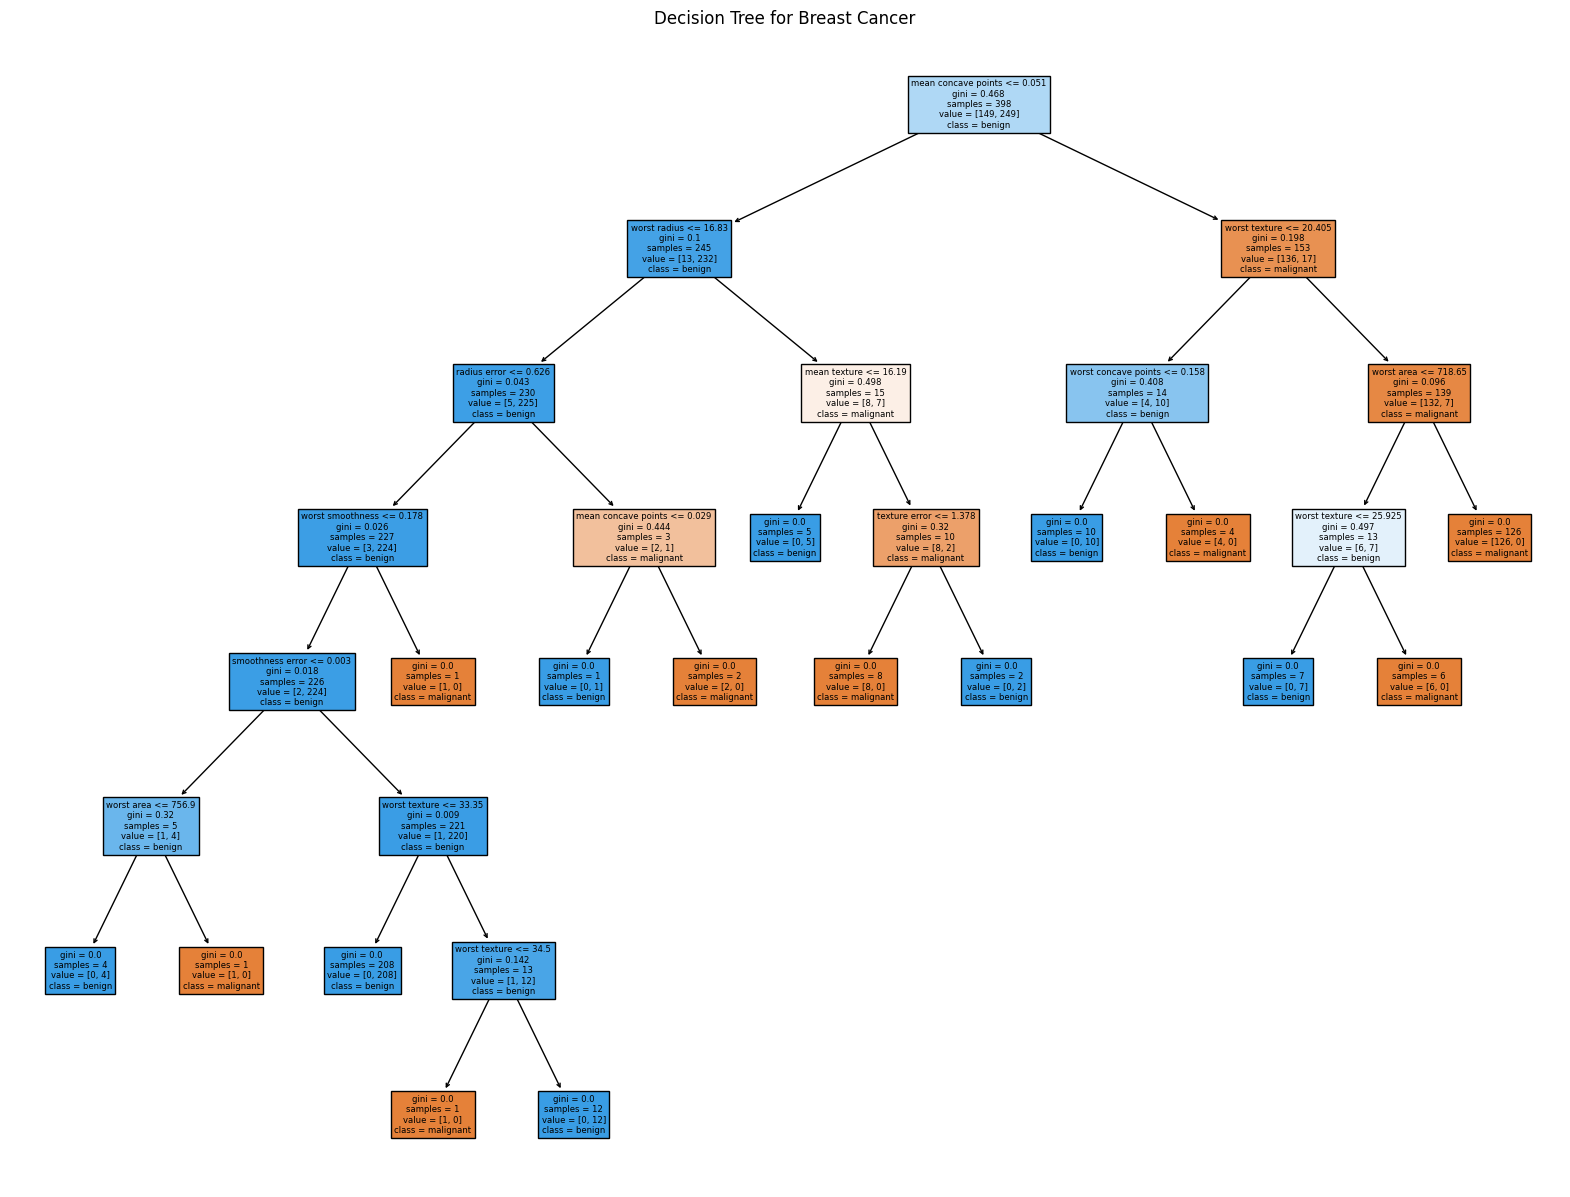

In [49]:
plt.figure(figsize=(20, 15))  # Increase figure size for better resolution
tree.plot_tree(clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.title("Decision Tree for Breast Cancer")
plt.savefig("decision_tree.png", dpi=300)  # Increase DPI for better resolution
plt.show()